# Some ins and outs of trial generation

## Control over proportions
Very frequently we want something to happen in an experiment with a certain probability across a range of trials. For example, we might want *congruent* and *incongruent* trials to occur equally often. Or we might want to have catch trials happen with a 10% probability. How do we do this?

### Leaving things to chance

An initial idea might be to use a `random.choice()` function. For example, in this case, we select *congruent* with a 50% probability:

In [25]:
import random
random.seed(6)
numTrials = 100
conditions=[]
for i in range(numTrials):
    conditions.append(random.choice(['congruent','incongruent']))

Let's check how frequent congruent is in conditions

In [26]:
print conditions.count('congruent')

49


Pretty close to 50! Not bad. But now let's look at the distributions of a hypothetical 40 subjects, each of whom is assigned congruent/incongruent trials in the manner above.

49.8 40 60


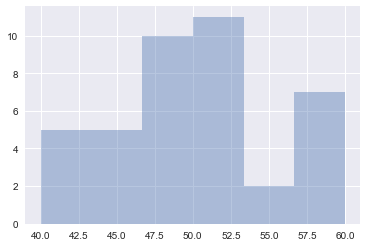

In [47]:
import seaborn as sns
import numpy as np

random.seed(6)
numSubj = 40
trialsPerSubject = 100
conditions=[]
for curSubj in range(numSubj):
    conditions.append([])
    for i in range(numTrials):
        conditions[curSubj].append(random.choice(['congruent','incongruent']))

frequencies = [thisSubj.count('congruent') for thisSubj in conditions]
sns.distplot(frequencies, kde=False); 
print np.mean(frequencies), min(frequencies), max(frequencies)

Ok, this isn't looking so good. The mean is close to 50, but some subjects are only getting 40% and others 60%. The situation gets worse when we have conditions that occur relatively rarely. Let's have a look at a trial sequence in which we would like to have 10% catch trials.

[12, 8, 6, 7, 6, 3, 8, 9, 15, 11, 9, 9, 11, 12, 14, 14, 10, 8, 5, 13, 7, 9, 12, 4, 6, 8, 11, 9, 17, 9, 9, 7, 10, 9, 12, 16, 12, 6, 6, 12]
9.525 3 17


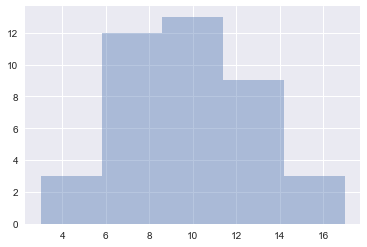

In [104]:
import seaborn as sns
import numpy as np

random.seed(8)
numSubj = 40
trialsPerSubject = 100
isCatchTrial=[]
for curSubj in range(numSubj):
    isCatchTrial.append([])
    for i in range(numTrials):
        isCatchTrial[curSubj].append(int(random.random() <= .1))

frequencies = [np.sum(thisSubj) for thisSubj in isCatchTrial]
print frequencies
sns.distplot(frequencies, kde=False); 
print np.mean(frequencies), min(frequencies), max(frequencies)

Instead of 10%, some subjects are seeing only 3%. Others 17%. This kind of variability can kill otherwise excellent experimental designs.

<div class="alert alert-block alert-info">
What's `random.random()<.1`? `random.random()` returns a float from 0 to 1.0 drawn from a uniform distribution. This means that random.random() can be expected to return a value < .1, 10% of the time.
</div>

If you're curious just how off-kilter things can get, consider an experiment in which instead of 100 trials, we have 40. With a certain condition happening a desired 10% of the time, when we leave things to chance, you have about a 1.4% of having a subject with *no* trials of this type at all and a ~2.7% of having these trials happen 20% instead of 10% of the time. The desired 10% will occur in only ~20% of the subjects.


In [106]:
import seaborn as sns
import numpy as np

numSubj = 40000
trialsPerSubject = 40
isCatchTrial=[]
for curSubj in range(numSubj):
    isCatchTrial.append([])
    for i in range(trialsPerSubject):
        isCatchTrial[curSubj].append(int(random.random() <= .1))

print np.mean([np.sum(thisSubj)==0 for thisSubj in isCatchTrial])
print np.mean([np.sum(thisSubj)==4 for thisSubj in isCatchTrial])
print np.mean([np.sum(thisSubj)==8 for thisSubj in isCatchTrial])

0.01505
0.20465
0.027325


### Exerting control over chance
The solution is to *not* leave things to chance, but specify precisely, the proportion you want. The easiest way of doing that is to create all your conditions, with prespecified proportions. Want 100 trials with a 50/50 split of congruent/incongruent? Easy!

In [80]:
numTrials=100
conditions = ['congruent','incongruent']*numTrials
conditions = conditions[0:numTrials]
conditions.count('congruent')

50

Then, to get a random order, simply `random.shuffle` it.

Want to get a 45/45/10 split between three conditions? Let's try it:

In [79]:
numTrials = 100
conditions = ['congruent']*int(numTrials*.45) + \
    ['incongruent']*int(numTrials*.45) + \
    ['catch']*int(numTrials*.1)
print conditions.count('congruent'), \ 
    conditions.count('incongruent'), \
    conditions.count('catch') 


45 45 10


 <div class="alert alert-block alert-info">
What's that '\' in the code-block above? It's a way to break up a long line for ease of reading. Python knows that lines that terminate with slashes should continue to the next line 
</div>

### Setting the random seed

When you perform any kind of randomization, the (pseudo) random-number generator (PRNG) is initialized with a *seed*. This seed determines everything that happens with the PRNG. If you know the starting seed, you can predict how a list is shuffled, what item is chosen from a list, and everything else that is "random". 

When you execute a randomization routine, the seed is set for your, usually using some transformation of the current time. However, it is frequently useful to set the seed manually. This allows you to re-execute your code using the very same "random" order. Let's see how this works.

Here, we initialize a list of numbers 1-20, shuffle it, print it, and then shuffle it/print it again. As you might expect, what you get are two different orders

In [5]:
import random

initial_list = range(20)
random.shuffle(initial_list)
print initial_list
random.shuffle(initial_list)
print initial_list

[1, 17, 11, 18, 12, 4, 5, 9, 10, 14, 13, 19, 7, 16, 15, 3, 6, 0, 8, 2]
[0, 4, 15, 12, 16, 17, 13, 6, 10, 7, 2, 1, 19, 14, 8, 9, 5, 11, 18, 3]


Now let's try that again, except we're going to set the seed to some arbitrary value at the outset 

In [6]:
import random

random.seed(10)
initial_list = range(20)
random.shuffle(initial_list)
print initial_list
random.shuffle(initial_list)
print initial_list

[15, 4, 19, 1, 17, 5, 0, 7, 18, 14, 16, 6, 2, 9, 12, 13, 3, 10, 8, 11]
[1, 16, 17, 0, 11, 5, 13, 3, 18, 4, 10, 15, 7, 8, 12, 2, 19, 6, 9, 14]


Now let's do that again:

In [7]:
import random

random.seed(10)
initial_list = range(20)
random.shuffle(initial_list)
print initial_list
random.shuffle(initial_list)
print initial_list

[15, 4, 19, 1, 17, 5, 0, 7, 18, 14, 16, 6, 2, 9, 12, 13, 3, 10, 8, 11]
[1, 16, 17, 0, 11, 5, 13, 3, 18, 4, 10, 15, 7, 8, 12, 2, 19, 6, 9, 14]


Notice that the randomization sequences in the two cases are exactly the same. By controlling the initial seed (i.e., starting point) of the PRNG, it becomes predictable (to us, though not to the participant).

## Combinations and permutations

When designing trial lists, it is frequently useful to cross two or more factors. We've already seen how to do this with nested for loops, but -- depending on your precise needs -- there's a more compact solution.


Let's say we have two crossed factors, `cue` (dog, cat, cow) and `target` (dog, cat, cow). Here's how you might generate all the combinations between these using a series of `for` loops.

In [10]:
cues = ['dog', 'cat', 'cow ']
targets = ['dog', 'cat', 'cow ']

trials = []
for curCue in cues:
    for curTarget in targets:
        trials.append((curCue,curTarget))
print trials

[('dog', 'dog'), ('dog', 'cat'), ('dog', 'cow '), ('cat', 'dog'), ('cat', 'cat'), ('cat', 'cow '), ('cow ', 'dog'), ('cow ', 'cat'), ('cow ', 'cow ')]


Here's the more compact way using the `itertools` package

In [19]:
from itertools import product

cues = ['dog', 'cat', 'cow ']
targets = ['dog', 'cat', 'cow ']

trials = product(cues,targets)
print list(trials)

[('dog', 'dog'), ('dog', 'cat'), ('dog', 'cow '), ('cat', 'dog'), ('cat', 'cat'), ('cat', 'cow '), ('cow ', 'dog'), ('cow ', 'cat'), ('cow ', 'cow ')]


`itertools` also has functions for generating permutations and combinations, useful when you want to generate combinations (order doesn't matter) or permutations (order matters) of your factors. Suppose for example, you want to generate all possible cue-pairs:

In [20]:
from itertools import combinations, permutations

cues = ['dog', 'cat', 'cow', 'penguin', 'dolphin']

trials = combinations(cues,2)
print list(trials)



[('dog', 'cat'), ('dog', 'cow'), ('dog', 'penguin'), ('dog', 'dolphin'), ('cat', 'cow'), ('cat', 'penguin'), ('cat', 'dolphin'), ('cow', 'penguin'), ('cow', 'dolphin'), ('penguin', 'dolphin')]


Suppose you want *permutations* instead. Easy.

In [23]:
from itertools import combinations, permutations

cues = ['dog', 'cat', 'cow', 'penguin', 'dolphin']

trials = permutations(cues,2)
print list(trials)


[('dog', 'cat'), ('dog', 'cow'), ('dog', 'penguin'), ('dog', 'dolphin'), ('cat', 'dog'), ('cat', 'cow'), ('cat', 'penguin'), ('cat', 'dolphin'), ('cow', 'dog'), ('cow', 'cat'), ('cow', 'penguin'), ('cow', 'dolphin'), ('penguin', 'dog'), ('penguin', 'cat'), ('penguin', 'cow'), ('penguin', 'dolphin'), ('dolphin', 'dog'), ('dolphin', 'cat'), ('dolphin', 'cow'), ('dolphin', 'penguin')]


<div class="alert alert-block alert-info">
Why are we wrapping trials inside a list() statement? Because itertools functions return iterators rather than lists. Read about iterators and generators [here](https://anandology.com/python-practice-book/iterators.html).
</div>

## Indivisibility and combinatorial explosions

### Indivisibility
It's nice that `.45 * 100 = 45` - an integer, but what if we only have 42 trials to work with and we need something to happen 10% of the time? The short answer is -- too bad -- we can't. But what we *can* do is ensure that something happens as close to 10% of the time as possible. Here's how to do that. 

In [193]:
propMatch = 0.1
propMismatch = 1-propMatch
numTrials = 42

trials = ['mismatch']*int(round(numTrials*propMismatch)) + \
        ['match']*int(round(numTrials*propMatch))
    
print "there are", float(len(trials))/trials.count('match'), \
'% match trials out of', len(trials), 'total trials'


float(len(trials))/trials.count('match')

there are 10.5 % match trials out of 42 total trials


10.5

### Combinatorial explosions
What happens if we have lots of factors and need to cross them, but doing so generates too many trials to use? 

For example, uppose we have 50 images
and we want to measure their visual similarities. One very sensitive way of doing this is to present people with pairs of images and have them respond, as quickly as possible whether the two images are the same or different. We then use the reaction time to respond 'different' as a measure of visual similarity. The more visually similar they are, the longer people will take to judge them as being different. 

In implementing this task we run into two problems. **First**, although we're only interested in the trials on which the two images are different, we need to have some trials on which the two images are identical (otherwise participants can just hit the 'different' button every time without bothering to inspect the images. So we need to decide on the proportion of *same* trials. **Second** even with only 50 images, the number of possible combinations is `50*49/2=1225` (excluding identical pairs). That's far far too many to test sensibly, especially since in a study like this we want to sample each pair at least 10 times per subject to get a somewhat stable RT estimate.


In [194]:
import random
from itertools import combinations

images = range(50) #here just numbers, but can be filenames or anything else
repetitionsPerImage = 10
numDiffTrialsPerPerson = 350

#35 is a factor of 1225, so let's have each person be tested on 35 pairs, 
#with each pair sampled 10 times. So we have 350 different trials, 
#Let's sample the same trials twice each (100 trials), so we have a total of 
#350+400 = 450 trials per person 


def n_pairs(images,n,repetitionsPerImage,setNum,seed1,seed2):
    random.seed(seed1)
    random.shuffle(images)

    same_trials = [(image,image) for image in images] * 2
    diff_pairs = list(combinations(images,2))

    diff_trials = diff_pairs[(setNum-1)*n/repetitionsPerImage:setNum*n/repetitionsPerImage] * repetitionsPerImage
    
    all_trials = diff_trials+same_trials
    random.seed(seed2)
    random.shuffle(all_trials)
    return all_trials

#you would then run groups of subjects on the following sets of trials (setNum would be \
# a runtime variable. Here, we're arbitrarily using a random seed of 10. 
# The exact number is unimportant. What's important is that it's the same seed for all
# The use of a secod seed ensures that the order of trial-types (same/diff) is different
# for different subjects
trials = n_pairs(images,numDiffTrialsPerPerson,repetitionsPerImage,1,10,101)
trials = n_pairs(images,numDiffTrialsPerPerson,repetitionsPerImage,2,10,102)
trials = n_pairs(images,numDiffTrialsPerPerson,repetitionsPerImage,3,10,103)
trials = n_pairs(images,numDiffTrialsPerPerson,repetitionsPerImage,4,10,104)
trials = n_pairs(images,numDiffTrialsPerPerson,repetitionsPerImage,5,10,105)
trials = n_pairs(images,numDiffTrialsPerPerson,repetitionsPerImage,6,10,106)
#... all the way until set 35:
trials = n_pairs(images,numDiffTrialsPerPerson,repetitionsPerImage,35,10,135)
# We need 35 subjects to sample 350 trials 10 times each
#the last subject will see these trials:
print trials


[(28, 30), (44, 47), (35, 44), (34, 34), (48, 35), (48, 38), (32, 32), (35, 38), (35, 47), (35, 38), (2, 2), (35, 28), (42, 6), (27, 27), (48, 44), (42, 6), (47, 6), (35, 6), (38, 6), (48, 47), (44, 6), (42, 6), (48, 44), (28, 28), (38, 44), (42, 44), (42, 38), (15, 15), (35, 44), (19, 19), (28, 6), (42, 30), (43, 43), (16, 16), (22, 22), (38, 6), (42, 47), (48, 35), (35, 47), (44, 44), (42, 38), (39, 39), (48, 28), (35, 28), (28, 30), (37, 37), (42, 35), (45, 45), (38, 28), (42, 42), (38, 28), (42, 38), (35, 28), (35, 44), (38, 30), (48, 30), (44, 47), (22, 22), (38, 30), (35, 38), (48, 44), (48, 38), (44, 28), (42, 28), (29, 29), (47, 47), (44, 28), (40, 40), (1, 1), (28, 30), (47, 28), (48, 6), (42, 30), (12, 12), (42, 38), (15, 15), (48, 38), (44, 6), (38, 38), (47, 6), (31, 31), (44, 28), (42, 30), (42, 28), (35, 6), (28, 6), (46, 46), (30, 30), (14, 14), (47, 47), (48, 47), (44, 30), (48, 35), (48, 35), (35, 30), (48, 35), (47, 6), (42, 6), (48, 6), (42, 28), (35, 30), (38, 28), 